Authenticate and Connect to Google Drive

In [ ]:
# authenticate and connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [ ]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import seaborn as sns  # Importing the seaborn library for data visualization

Load Data

In [ ]:
#File Path: /content/drive/MyDrive/kickstarter_clean.csv


csv_path = "/content/drive/MyDrive/kickstarter_face_detection.csv" #Set the file path for the CSV file containing Kickstarter data
df = pd.read_csv(csv_path) #Read the CSV file into a pandas DataFrame
df.head() #Display the first few rows of the DataFrame

,id,name,blurb,state,goal,parent_category,sub_category,country,city,currency,project_url,reward_url,photo_url,creation_date,create_to_launch,create_to_deadline,launch_to_deadline,is_face_retinaface,is_face_opencv
0,1220845720,KYON:The pet collar re-invented,KYON is the thinnest GPS pet tracker collar to...,successful,75000.0,Technology,Wearables,Greece,Athens,USD,https://www.kickstarter.com/projects/kyontrack...,https://www.kickstarter.com/projects/kyontrack...,https://ksr-ugc.imgix.net/assets/012/360/904/3...,2016-01-22 16:44:55,53.9,113.9,60.0,0,0
1,761295303,Walker: Eyewear for Discovery Experiences whil...,Make your everyday walk smarter and more fun w...,successful,115000.0,Technology,Wearables,United States,Sunnyvale,USD,https://www.kickstarter.com/projects/telepathy...,https://www.kickstarter.com/projects/telepathy...,https://ksr-ugc.imgix.net/assets/012/379/192/9...,2016-02-12 06:06:48,32.5,65.8,33.4,0,0
2,2042355245,"iBackPack 2.0 - 4G MiFI, HiTech Batteries - Sm...","iBackPack 2.0 - 3G/4G Wi-Fi/Mi-Fi, Bluetooth ...",successful,50000.0,Technology,Wearables,United States,Austin,USD,https://www.kickstarter.com/projects/ibackpack...,https://www.kickstarter.com/projects/ibackpack...,https://ksr-ugc.imgix.net/assets/012/233/312/8...,2015-08-24 20:17:10,197.7,232.6,35.0,0,0
3,1252795414,"EZC Smartlight ""The Smarter Way To Ride""",A rider worn tail light brake light. Adheres t...,successful,400.0,Technology,Wearables,Canada,Peterborough,CAD,https://www.kickstarter.com/projects/144329107...,https://www.kickstarter.com/projects/144329107...,https://ksr-ugc.imgix.net/assets/012/396/918/0...,2016-03-03 19:17:23,4.7,39.7,35.0,0,1
4,381701864,Knuckle Lights: Rechargeable,The first and only lights designed to be worn ...,successful,15000.0,Technology,Wearables,United States,West Linn,USD,https://www.kickstarter.com/projects/knuckleli...,https://www.kickstarter.com/projects/knuckleli...,https://ksr-ugc.imgix.net/assets/012/354/571/9...,2016-01-15 05:36:01,49.8,79.7,30.0,0,0


Get the percentage of failed and successful projects for each sub-category

In [ ]:
# Grouping the data by sub_category and counting occurrences
category_counts = df.groupby('sub_category')['state'].value_counts().unstack()

# Calculating the percentages
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100

# Sorting the categories based on the percentages of "successful"
category_percentages_sorted = category_percentages.sort_values(by='successful', ascending=False)

# Printing the sorted percentages
print(category_percentages_sorted)


state                 failed  successful
sub_category                            
Latin                    NaN  100.000000
Indie Rock               NaN  100.000000
Rock                     NaN  100.000000
R&B                      NaN  100.000000
Punk                     NaN  100.000000
Pop                      NaN  100.000000
Music                    NaN  100.000000
Metal                    NaN  100.000000
Kids                     NaN  100.000000
Jazz                     NaN  100.000000
World Music              NaN  100.000000
Country & Folk           NaN  100.000000
Faith                    NaN  100.000000
Electronic Music         NaN  100.000000
Hip-Hop                  NaN  100.000000
Classical Music    14.592094   85.407906
Chiptune           22.222222   77.777778
Comedy             31.141869   68.858131
Plays              35.973597   64.026403
Experimental       36.099585   63.900415
Festivals          38.461538   61.538462
Musical            41.552901   58.447099
Immersive       

Get the percentage of failed and successful projects for each parent-category

In [ ]:
# Group data by parent_category and count occurrences
category_counts = df.groupby('parent_category')['state'].value_counts().unstack()

# Calculating the percentages
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100

# Sorting the categories based on the percentages of "successful"
category_percentages_sorted = category_percentages.sort_values(by='successful', ascending=False)

# Printing the sorted percentages
print(category_percentages_sorted)

state               failed  successful
parent_category                       
Music            13.800259   86.199741
Theater          38.141157   61.858843
Technology       65.822785   34.177215


How many missing values are in the dataset?



In [ ]:
missing_values = df.isnull().sum() #Checking for missing values in the DataFrame and summing them
print(missing_values) #Printing the count of missing values

id                    0
name                  0
blurb                 0
state                 0
goal                  0
parent_category       0
sub_category          0
country               0
city                  0
currency              0
project_url           0
reward_url            0
photo_url             0
creation_date         0
create_to_launch      0
create_to_deadline    0
launch_to_deadline    0
is_face_retinaface    0
is_face_opencv        0
dtype: int64


Pie chart for an overview of the percentage of successful and not successful projects

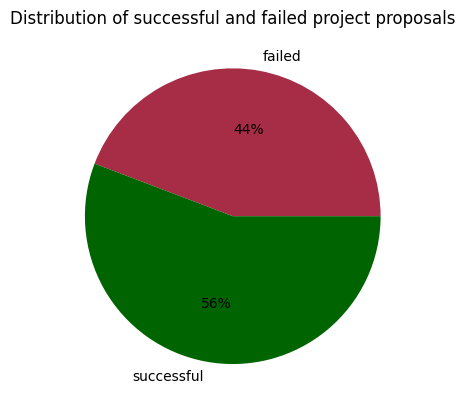

In [ ]:
import matplotlib.pyplot as plt # import matplotlib

# get the data for the diagram
pie_plot_df = df[['state']].copy()
pie_plot_df = pie_plot_df.groupby(by = ["state"]).size().reset_index(name='counts')

# Colors for the segments of the pie chart
colors = ['#a62d45', '#006400']  # Dunkelgrün und Hellrot

# Creating the pie chart using matplotlib
plt.pie(pie_plot_df['counts'], labels = pie_plot_df['state'], autopct='%.0f%%', colors=colors)

# Adding the title
plt.title('Distribution of successful and failed project proposals')

# Displaying the chart
plt.show()


Distribution of Sub-Categories

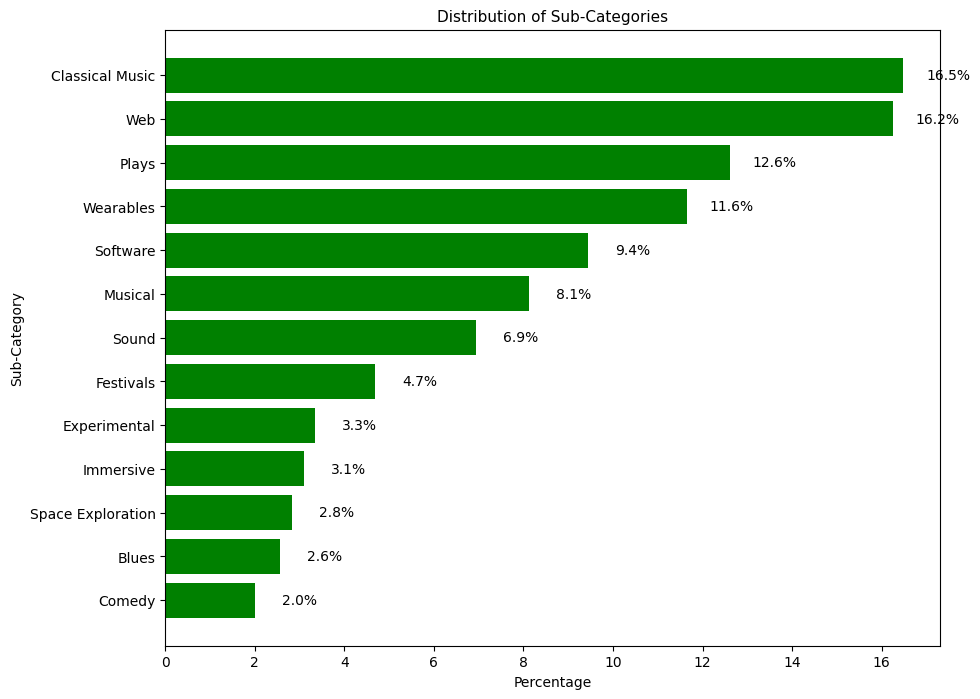

In [ ]:
# Retrieving data and sorting it in descending order
bar_plot_df = df[['sub_category']].copy()
bar_plot_df = bar_plot_df.groupby(by=["sub_category"]).size().reset_index(name='counts')
bar_plot_df = bar_plot_df[bar_plot_df['counts'] > 250]
total_counts = bar_plot_df['counts'].sum()
bar_plot_df['percent'] = bar_plot_df['counts'] / total_counts * 100
bar_plot_df = bar_plot_df.sort_values(by=['percent'], ascending=True)

# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(bar_plot_df['sub_category'], bar_plot_df['percent'], color='green')
ax.set_title('Distribution of Sub-Categories', fontsize=11)
ax.set_xlabel('Percentage', fontsize=10)
ax.set_ylabel('Sub-Category', fontsize=10)

# add text labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', ha='center', va='center')

# display the bar chart
plt.show()

Distribution of parent_category

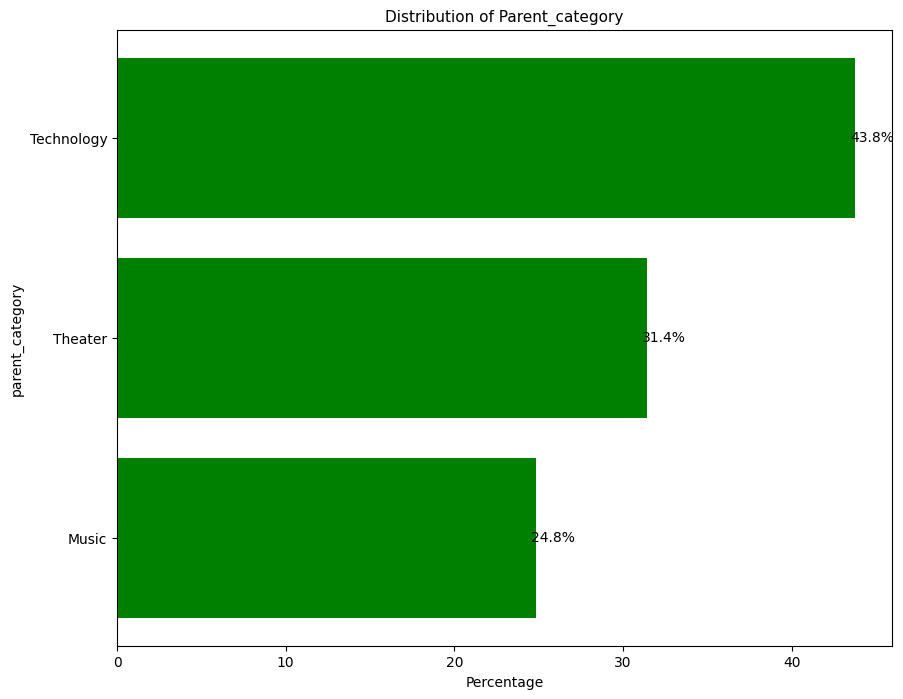

In [ ]:
# Retrieving data and sorting it in descending order
bar_plot_df = df[['parent_category']].copy()
bar_plot_df = bar_plot_df.groupby(by=["parent_category"]).size().reset_index(name='counts')
bar_plot_df = bar_plot_df[bar_plot_df['counts'] > 250]
total_counts = bar_plot_df['counts'].sum()
bar_plot_df['percent'] = bar_plot_df['counts'] / total_counts * 100
bar_plot_df = bar_plot_df.sort_values(by=['percent'], ascending=True)

# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(bar_plot_df['parent_category'], bar_plot_df['percent'], color='green')
ax.set_title('Distribution of Parent_category', fontsize=11)
ax.set_xlabel('Percentage', fontsize=10)
ax.set_ylabel('parent_category', fontsize=10)

# add text labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', ha='center', va='center')

# display the bar chart
plt.show()

Overview of the distribution of project plans by country

In [ ]:
import plotly.express as px # Importing the plotly.express module

# Extracting data from the DataFrame
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'counts']

# Creating the choropleth plot with adjusted scale and gradient
fig = px.choropleth(country_counts, locations='country', locationmode='country names', color='counts',
                    color_continuous_scale=[(0, '#ffffff'), (0.2, '#4c8f4c'), (0.4, '#398739'), (0.6, '#237523'), (0.8, '#1b631b'), (1, '#094509')],
                    color_discrete_sequence=px.colors.qualitative.Dark2)


# Display the plot
fig.show()

Percentage Distribution of Countries

In [ ]:
# Extract data from DataFrame
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'counts']

# Limit to the 8 most common countries - Percent distribution over 2%
top_countries = country_counts.head(8)

# Calculation of percentage distribution
top_countries['percentage'] = top_countries['counts'] / top_countries['counts'].sum() * 100

# Format percentages
top_countries['percentage'] = top_countries['percentage'].apply(lambda x: '{:.2f}%'.format(x))

# Create the table
table = pd.DataFrame({'Country': top_countries['country'],
                      'Number of Projects': top_countries['counts'],
                      'Percentage of Projects': top_countries['percentage']})

# Output the table
print(table.to_string(index=False))

       Country  Number of Projects Percentage of Projects
 United States                9370                 67.40%
United Kingdom                2327                 16.74%
        Canada                 635                  4.57%
       Germany                 355                  2.55%
     Australia                 339                  2.44%
         Italy                 304                  2.19%
        Mexico                 295                  2.12%
        France                 277                  1.99%


<ipython-input-11-e2dd438145fa>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-e2dd438145fa>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pie Chart: Distribution of projects among countries

In [ ]:
# Extract country censuses
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'counts']

# Split the 8 most common countries and combine the remaining countries into "others"
top_countries = country_counts.head(8)
other_count = pd.DataFrame({'country': ['others'], 'counts': [country_counts['counts'][8:].sum()]})
country_counts = pd.concat([top_countries, other_count], ignore_index=True)

# Calculate percentages
total_counts = country_counts['counts'].sum()
country_counts['percentage'] = country_counts['counts'] / total_counts * 100

# create pie chart
fig = px.pie(country_counts, values='counts', names='country',title='Distribution of projects among countries', hole=0.4, 
             color_discrete_sequence=px.colors.qualitative.Dark2)

# Add percentages as text in the pie chart
fig.update_traces(textposition='inside', textinfo='percent+label')

# display the plot
fig.show()


Create_to_deadline distribution, min, max and mean

<ipython-input-13-c00cff562942>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




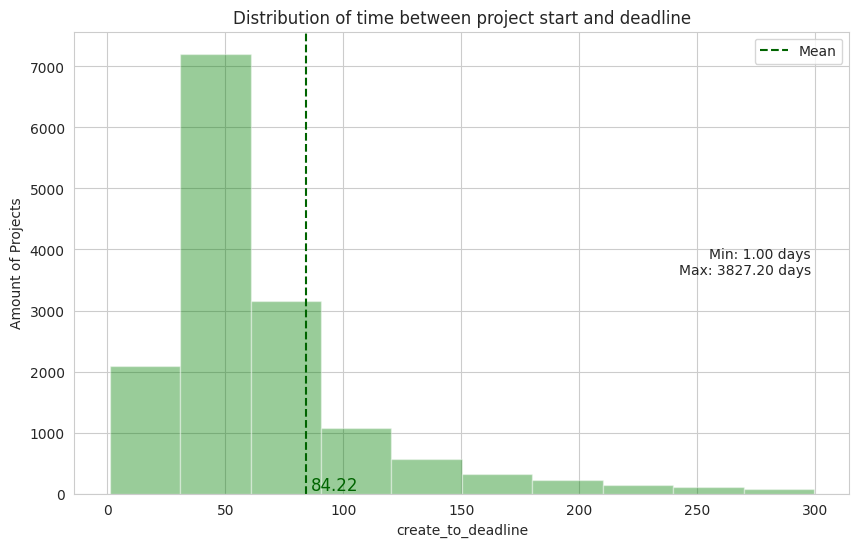

In [ ]:
# Set style and size
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# create the plot
ax = sns.distplot(df[df['create_to_deadline'] < 300]['create_to_deadline'], bins=10, kde=False, color='green')

# add title
plt.title('Distribution of time between project start and deadline')
ax.set_ylabel('Amount of Projects')

# calculate mean, min, max
mean_val = df['create_to_deadline'].mean()
data_min = df['create_to_deadline'].min()
data_max = df['create_to_deadline'].max()

# Draw the lines and labels
ax.axvline(mean_val, color='darkgreen', linestyle='--', label='Mean')

# Draw the captions
ax.text(mean_val+2, 50, f"{mean_val:.2f}", fontsize=12, color='darkgreen')

# add text
plt.text(0.95, 0.5, f"Min: {data_min:.2f} days\nMax: {data_max:.2f} days", transform=plt.gca().transAxes, ha='right', va='center')

# display legend
plt.legend()

# display the plot
plt.show()


Project Goal distribution, min, max and mean

<ipython-input-14-e66c770d5c37>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




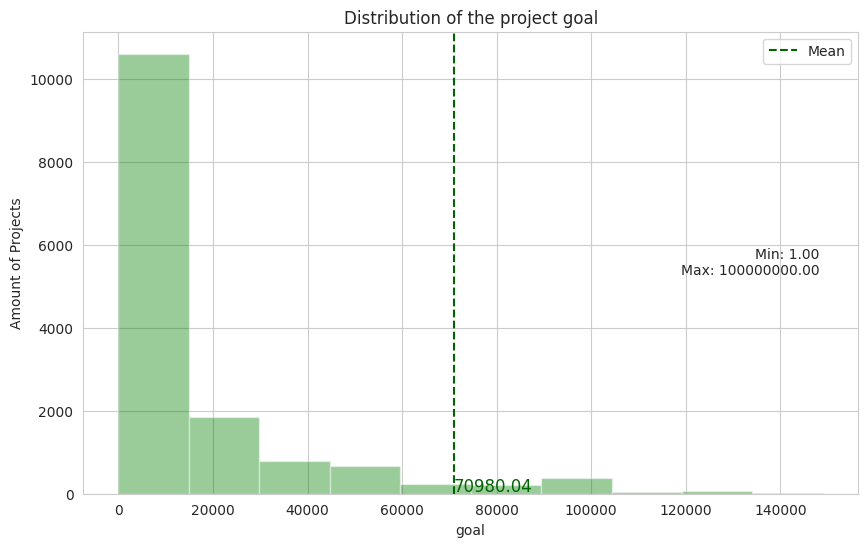

In [ ]:
# Set style and size
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# create plot
ax = sns.distplot(df[df['goal'] < 150000]['goal'], kde=False, color='green', bins=10)

# add title
plt.title('Distribution of the project goal')
ax.set_ylabel('Amount of Projects')

# calculate mean, min, max
mean_val = df['goal'].mean()
data_min = df['goal'].min()
data_max = df['goal'].max()

# Draw the lines and labels
ax.axvline(mean_val, color='darkgreen', linestyle='--', label='Mean')

# Draw the captions
ax.text(mean_val+2, 50, f"{mean_val:.2f}", fontsize=12, color='darkgreen')

# add text
plt.text(0.95, 0.5, f"Min: {data_min:.2f}\nMax: {data_max:.2f}", transform=plt.gca().transAxes, ha='right', va='center')

# display legend
plt.legend()

# display the plot
plt.show()

create_to_launch distribution, min, max and mean

<ipython-input-15-0e79869d27a8>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




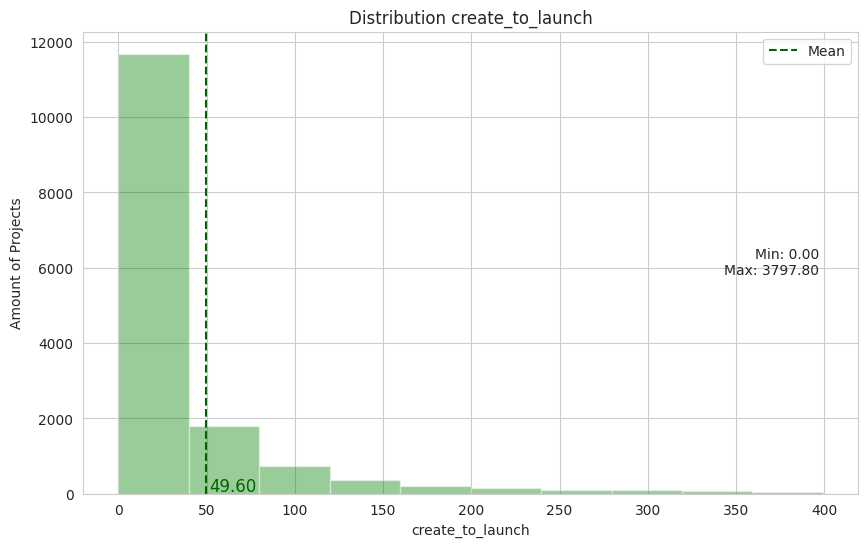

In [ ]:
# set style and size
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# create plot
ax = sns.distplot(df[df['create_to_launch'] < 400]['create_to_launch'], kde=False, color='green', bins=10)

# add title
plt.title('Distribution create_to_launch')
ax.set_ylabel('Amount of Projects')

# calculate mean, min, max
mean_val = df['create_to_launch'].mean()
data_min = df['create_to_launch'].min()
data_max = df['create_to_launch'].max()

# Draw the lines and labels
ax.axvline(mean_val, color='darkgreen', linestyle='--', label='Mean')

# Draw the captions
ax.text(mean_val+2, 50, f"{mean_val:.2f}", fontsize=12, color='darkgreen')

# add text
plt.text(0.95, 0.5, f"Min: {data_min:.2f}\nMax: {data_max:.2f}", transform=plt.gca().transAxes, ha='right', va='center')

# display legend
plt.legend()

# display the plot
plt.show()

create_to_deadline distribution, min, max and mean

<ipython-input-16-5f1fbb106ecc>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




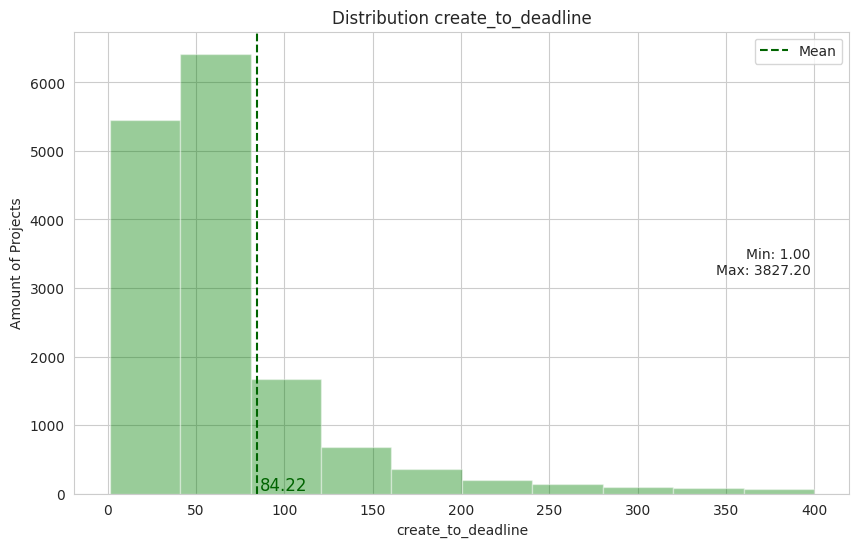

In [ ]:
# set style and size
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# create plot
ax = sns.distplot(df[df['create_to_deadline'] < 400]['create_to_deadline'], kde=False, color='green', bins=10)

# add title
plt.title('Distribution create_to_deadline')
ax.set_ylabel('Amount of Projects')

# calculate mean, min, max
mean_val = df['create_to_deadline'].mean()
data_min = df['create_to_deadline'].min()
data_max = df['create_to_deadline'].max()

# Draw the lines and labels
ax.axvline(mean_val, color='darkgreen', linestyle='--', label='Mean')

# Draw the captions
ax.text(mean_val+2, 50, f"{mean_val:.2f}", fontsize=12, color='darkgreen')

# add text
plt.text(0.95, 0.5, f"Min: {data_min:.2f}\nMax: {data_max:.2f}", transform=plt.gca().transAxes, ha='right', va='center')

# display legend
plt.legend()

# display the plot
plt.show()

launch_to_deadline distribution, min, max and mean

<ipython-input-17-bb66bbf59515>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




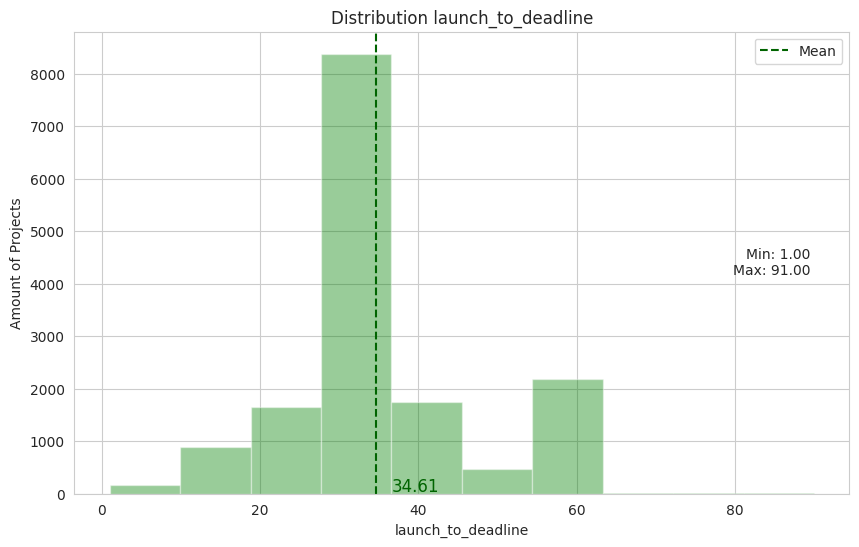

In [ ]:
# set style and size
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# create plot
ax = sns.distplot(df[df['launch_to_deadline'] < 91]['launch_to_deadline'], kde=False, color='green', bins=10)

# add title
plt.title('Distribution launch_to_deadline')
ax.set_ylabel('Amount of Projects')

# calculate mean, min, max
mean_val = df['launch_to_deadline'].mean()
data_min = df['launch_to_deadline'].min()
data_max = df['launch_to_deadline'].max()

# Draw the lines and labels
ax.axvline(mean_val, color='darkgreen', linestyle='--', label='Mean')

# Draw the captions
ax.text(mean_val+2, 50, f"{mean_val:.2f}", fontsize=12, color='darkgreen')

# add text
plt.text(0.95, 0.5, f"Min: {data_min:.2f}\nMax: {data_max:.2f}", transform=plt.gca().transAxes, ha='right', va='center')

# display legend
plt.legend()

# display the plot
plt.show()

Creation of a new data frame that contains dummy variables in order to determine correlations in further steps

In [ ]:
# create a new dataframe 'new_df' with the transformed columns 
new_df = df.copy()
new_df['state'] = new_df['state'].map({'successful': 1, 'failed': 0}) 
new_df['project_url'] = new_df['project_url'].apply(lambda x: 1 if pd.notnull(x) else 0)
new_df['reward_url'] = new_df['reward_url'].apply(lambda x: 1 if pd.notnull(x) else 0)
new_df['photo_url'] = new_df['photo_url'].apply(lambda x: 1 if pd.notnull(x) else 0)

new_df['create_to_launch'] = df['create_to_launch']
new_df['create_to_deadline'] = df['create_to_deadline']
new_df['launch_to_deadline'] = df['launch_to_deadline']
new_df['goal'] = df['goal']

# verify the new dataframe
display(new_df.head())

,id,name,blurb,state,goal,parent_category,sub_category,country,city,currency,project_url,reward_url,photo_url,creation_date,create_to_launch,create_to_deadline,launch_to_deadline,is_face_retinaface,is_face_opencv
0,1220845720,KYON:The pet collar re-invented,KYON is the thinnest GPS pet tracker collar to...,1,75000.0,Technology,Wearables,Greece,Athens,USD,1,1,1,2016-01-22 16:44:55,53.9,113.9,60.0,0,0
1,761295303,Walker: Eyewear for Discovery Experiences whil...,Make your everyday walk smarter and more fun w...,1,115000.0,Technology,Wearables,United States,Sunnyvale,USD,1,1,1,2016-02-12 06:06:48,32.5,65.8,33.4,0,0
2,2042355245,"iBackPack 2.0 - 4G MiFI, HiTech Batteries - Sm...","iBackPack 2.0 - 3G/4G Wi-Fi/Mi-Fi, Bluetooth ...",1,50000.0,Technology,Wearables,United States,Austin,USD,1,1,1,2015-08-24 20:17:10,197.7,232.6,35.0,0,0
3,1252795414,"EZC Smartlight ""The Smarter Way To Ride""",A rider worn tail light brake light. Adheres t...,1,400.0,Technology,Wearables,Canada,Peterborough,CAD,1,1,1,2016-03-03 19:17:23,4.7,39.7,35.0,0,1
4,381701864,Knuckle Lights: Rechargeable,The first and only lights designed to be worn ...,1,15000.0,Technology,Wearables,United States,West Linn,USD,1,1,1,2016-01-15 05:36:01,49.8,79.7,30.0,0,0


Create a classic heat map with the selected variables

NameError: ignored

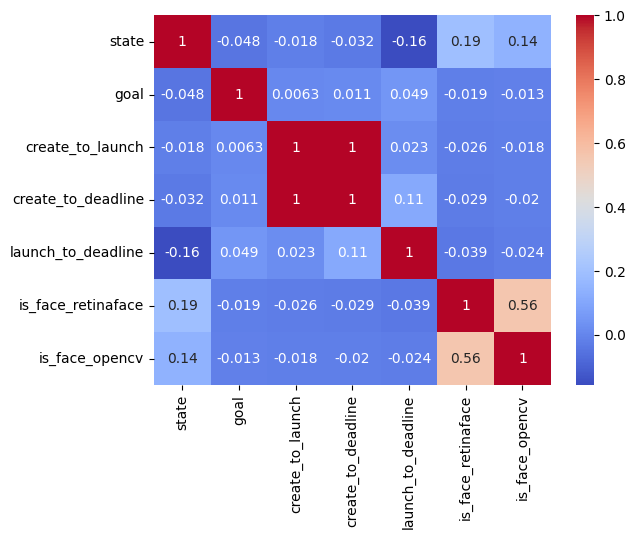

In [ ]:
# Select variables to create a heatmap in which correlations will be measured
variables = ['state', 'goal', 'create_to_launch', 'create_to_deadline', 'launch_to_deadline', 'is_face_retinaface', 'is_face_opencv']

# create the correlation matrix
corr_matrix = new_df[variables].corr()

# Create a heat map of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Creating a heatmap but only showing the correlation of the selected variables with "state"

NameError: ignored

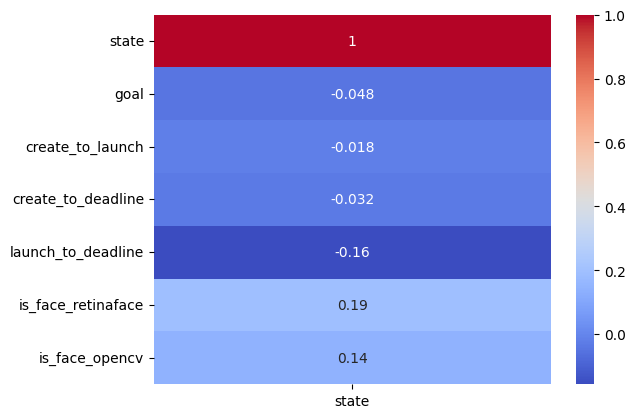

In [ ]:
# select variables
variables = ['state', 'goal', 'create_to_launch', 'create_to_deadline', 'launch_to_deadline', 'is_face_retinaface', 'is_face_opencv']

# create the correlation matrix
corr_matrix = new_df[variables].corr()

# Create a heat map of the correlation matrix
sns.heatmap(corr_matrix[['state']], annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Success rate of RetinaFace with recognized faces and without a recognized face

In [ ]:
# Number of projects with retinaface = 1
retinaface_projects = df[df["is_face_retinaface"] == 1].shape[0]

# Number of successful projects with retinaface = 1
retinaface_success = df[(df["is_face_retinaface"] == 1) & (df["state"] == "successful")].shape[0]

# Number of projects with retinaface = 0
non_retinaface_projects = df[df["is_face_retinaface"] == 0].shape[0]

# Number of successful projects with retinaface = 0
non_retinaface_success = df[(df["is_face_retinaface"] == 0) & (df["state"] == "successful")].shape[0]

# Calculate the success rate for projects with retinaface = 1 and retinaface = 0
retinaface_success_rate = (retinaface_success / retinaface_projects) * 100
non_retinaface_success_rate = (non_retinaface_success / non_retinaface_projects) * 100

# create the table
table = pd.DataFrame(columns=["Retinaface", "Success Rate"])
table = table.append({
    "Retinaface": 1,
    "Success Rate": retinaface_success_rate
}, ignore_index=True)
table = table.append({
    "Retinaface": 0,
    "Success Rate": non_retinaface_success_rate
}, ignore_index=True)

# display the table
print(table)


   Retinaface  Success Rate
0         1.0     68.271905
1         0.0     48.444217


<ipython-input-23-7c8e88696699>:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-23-7c8e88696699>:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Success rate of OpenCV with recognized faces and without a recognized face

In [ ]:
# Number of projects with opencv = 1
opencv_projects = df[df["is_face_opencv"] == 1].shape[0]

# Number of successful projects with opencv = 1
opencv_success = df[(df["is_face_opencv"] == 1) & (df["state"] == "successful")].shape[0]

# Number of projects with opencv = 0
non_opencv_projects = df[df["is_face_opencv"] == 0].shape[0]

# Number of successful projects with opencv = 0
non_opencv_success = df[(df["is_face_opencv"] == 0) & (df["state"] == "successful")].shape[0]

# Calculating the success rate for projects with opencv = 1 and opencv = 0
opencv_success_rate = (opencv_success / opencv_projects) * 100
non_opencv_success_rate = (non_opencv_success / non_opencv_projects) * 100

# Creating the table
table = pd.DataFrame(columns=["OpenCV", "Success Rate"])
table = table.append({
    "OpenCV": 1,
    "Success Rate": opencv_success_rate
}, ignore_index=True)
table = table.append({
    "OpenCV": 0,
    "Success Rate": non_opencv_success_rate
}, ignore_index=True)

# display the table
print(table)

   OpenCV  Success Rate
0     1.0     70.219124
1     0.0     52.318145


<ipython-input-24-9955d4764f93>:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-24-9955d4764f93>:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



RetinaFace success rate with recognized faces and no recognized face for each Parent_Category

In [ ]:
# Group by sub_category and is_face_retinaface
grouped = df.groupby(["parent_category", "is_face_retinaface"])

# Calculate success rate for each sub_category and is_face_retinaface
success_rates = grouped.apply(lambda x: (x[x["state"] == "successful"].shape[0] / x.shape[0]) * 100)

# Reformat the results into a tabletable = success_rates.unstack(level="is_face_retinaface")
table = table.rename(columns={0: "Retinaface 0", 1: "Retinaface 1"})
table = table.reset_index()

# display the table
print(table)

is_face_retinaface parent_category   -2  Retinaface 0  Retinaface 1
0                            Music  0.0     83.958333     87.572494
1                       Technology  NaN     33.198678     38.130564
2                          Theater  NaN     59.500693     65.276382


OpenCV success rate with recognized faces and no recognized face for each Parent_Category

In [ ]:
# Group by sub_category and is_face_opencv
grouped = df.groupby(["parent_category", "is_face_opencv"])

# Calculate success rate for each sub_category and is_face_opencv
success_rates = grouped.apply(lambda x: (x[x["state"] == "successful"].shape[0] / x.shape[0]) * 100)

# Reformat the results into a table
table = success_rates.unstack(level="is_face_opencv")
table = table.rename(columns={0: "Opencv 0", 1: "Opencv 1"})
table = table.reset_index()

# display the table
print(table)

is_face_opencv parent_category   -2   Opencv 0   Opencv 1
0                        Music  0.0  84.597433  89.477786
1                   Technology  NaN  33.890874  36.949686
2                      Theater  NaN  60.380852  66.971638
